In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
cifar10_dataset= keras.datasets.cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [5]:
import numpy as np
x=np.concatenate((x_train, x_test),axis=0)
x.shape

(60000, 32, 32, 3)

In [6]:
y=np.concatenate((y_train, y_test), axis=0)
y.shape

(60000, 1)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test_temp, y_train, y_test_temp = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
x_train.shape

(51000, 32, 32, 3)

In [ ]:
x_test_temp.shape

(9000, 32, 32, 3)

In [8]:
x_val, x_test, y_val, y_test = train_test_split(x_test_temp, y_test_temp, test_size=.5, random_state=42)
x_val.shape

(4500, 32, 32, 3)

### Data Preprocessing

In [9]:
X_train = x_train/255
X_test = x_test/255
X_val= x_val/255

X_train.shape

(51000, 32, 32, 3)

## #model definition

In [276]:
init_1 = keras.initializers.LecunUniform(seed=None)
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=[32,32,3]))

model.add(keras.layers.Dense(units =16, activation = 'selu', kernel_initializer= init_1))
model.add(keras.layers.Dense(units =16, activation = 'selu', kernel_initializer= init_1))


model.add(keras.layers.Dense(units =10, activation = 'softmax' ))

In [269]:
model.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_45 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 16)             │        49,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,338 (192.73 KB)

 Trainable params: 49,338 (192.73 KB)

 Non-trainable params: 0 (0.00 B)

In [270]:
model.layers

[<Flatten name=flatten_45, built=True>,
 <Dense name=dense_148, built=True>,
 <Dense name=dense_149, built=True>]

### model compile

In [277]:
model.compile(optimizer=tf.optimizers.SGD(momentum=0.9,nesterov=True)
              ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [278]:
hist = model.fit(X_train,y_train,epochs=50, batch_size=32,validation_data=(X_val,y_val))

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.2861 - loss: 1.9779 - val_accuracy: 0.3642 - val_loss: 1.7521
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.3708 - loss: 1.7349 - val_accuracy: 0.3836 - val_loss: 1.7133
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.3845 - loss: 1.7003 - val_accuracy: 0.3656 - val_loss: 1.7313
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - accuracy: 0.3980 - loss: 1.6690 - val_accuracy: 0.3944 - val_loss: 1.6763
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4067 - loss: 1.6469 - val_accuracy: 0.3862 - val_loss: 1.7158
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4165 - loss: 1.6358 - val_accuracy: 0.3976 - val_loss: 1.6760
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.4131 - loss: 1.6282 - val_accuracy: 0.4078 - val_loss: 1.6443
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.4169 - los

In [279]:
model.evaluate(X_val,y_val)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.4436 - loss: 1.6155


[1.6168442964553833, 0.4328888952732086]

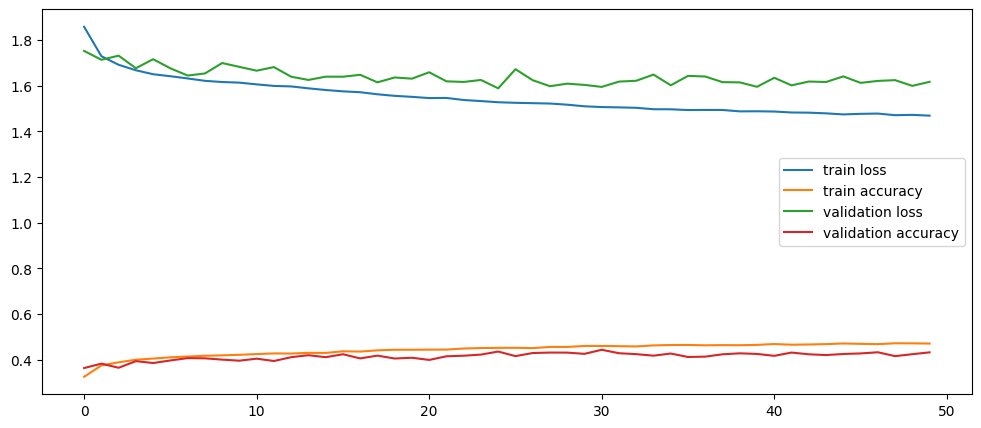

In [280]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist.history["loss"], label="train loss")
ax.plot(hist.history["accuracy"], label="train accuracy")
ax.plot(hist.history["val_loss"], label="validation loss")
ax.plot(hist.history["val_accuracy"], label="validation accuracy")
ax.legend()

###model_1 normalization

In [281]:

model_1 = keras.Sequential()

model_1.add(keras.layers.Flatten(input_shape=[32,32,3]))
model_1.add(keras.layers.BatchNormalization())

model_1.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform' ))
model_1.add(keras.layers.BatchNormalization())

model_1.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform' ))
model_1.add(keras.layers.BatchNormalization())



model_1.add(keras.layers.Dense(units =10, activation = 'softmax' ))
model_1.summary()


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_47 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 3072)           │        12,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 16)             │        49,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,026 (242.29 KB)

 Trainable params: 55,818 (218.04 KB)

 Non-trainable params: 6,208 (24.25 KB)

In [282]:
model_1.compile(optimizer=tf.optimizers.SGD(momentum=0.9,nesterov=True)
              ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [283]:
hist_1 = model_1.fit(X_train,y_train,epochs=50, batch_size=32,validation_data=(X_val,y_val))

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3089 - loss: 1.9221 - val_accuracy: 0.3842 - val_loss: 1.6963
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3933 - loss: 1.6951 - val_accuracy: 0.4158 - val_loss: 1.6208
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4146 - loss: 1.6351 - val_accuracy: 0.4224 - val_loss: 1.5944
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4255 - loss: 1.6026 - val_accuracy: 0.4362 - val_loss: 1.5566
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4333 - loss: 1.5800 - val_accuracy: 0.4371 - val_loss: 1.5638
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4439 - loss: 1.5607 - val_accuracy: 0.4444 - val_loss: 1.5529
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4416 - loss: 1.5555 - val_accuracy: 0.4413 - val_loss: 1.5614
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4470 - loss: 1.5480 - 

In [285]:
model_1.evaluate(X_val,y_val)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.4615 - loss: 1.5190


[1.515367031097412, 0.4588888883590698]

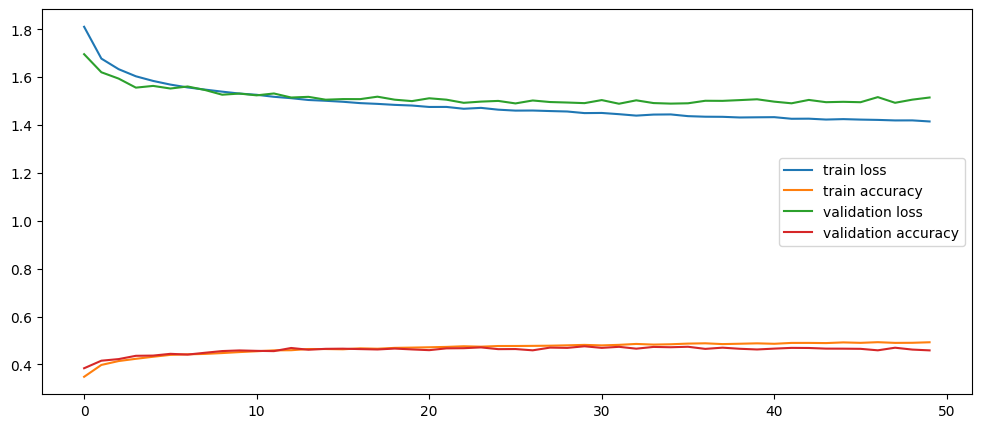

In [284]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist_1.history["loss"], label="train loss")
ax.plot(hist_1.history["accuracy"], label="train accuracy")
ax.plot(hist_1.history["val_loss"], label="validation loss")
ax.plot(hist_1.history["val_accuracy"], label="validation accuracy")
ax.legend()

better model for cifar10

In [286]:
model_1.save("model_1.keras")

In [287]:
model_1=keras.models.load_model("model_1.keras")

In [288]:
model_1_cloned=keras.models.clone_model(model_1)
model_1_cloned.set_weights(model_1.get_weights())

In [289]:
model_1.layers[2].trainable

True

In [290]:
model_1_new=keras.models.Sequential(model_1.layers[:-1])
model_1_new.summary()


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_47 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 3072)           │        12,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 16)             │        49,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,856 (241.62 KB)

 Trainable params: 55,648 (217.38 KB)

 Non-trainable params: 6,208 (24.25 KB)

In [291]:
model_1_new.add(keras.layers.Dense(units =1 ,activation="sigmoid"))

In [292]:
model_1_new.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_47 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 3072)           │        12,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 16)             │        49,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,856 (241.62 KB)

 Trainable params: 55,648 (217.38 KB)

 Non-trainable params: 6,208 (24.25 KB)

In [293]:
for layer in model_1_new.layers[:-1]:
  layer.trainable= False
  print(layer.trainable)

False
False
False
False
False
False


In [294]:
model_1_new.layers[-1].trainable

True

In [295]:
model_1_new.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_47 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 3072)           │        12,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 16)             │        49,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,856 (241.62 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 61,856 (241.62 KB)

In [20]:
y_train_new=np.where(y_train==7, 1, 0)[:6000]

In [297]:
np.sum(y_train_new)

573

In [21]:
x_train_new=x_train[:6000, :, :]


In [299]:
model_1_new.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [300]:
hist_new=model_1_new.fit(x_train_new,y_train_new,epochs=50,validation_split=.15)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8208 - loss: 150.1279 - val_accuracy: 0.9167 - val_loss: 95.9237
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8695 - loss: 68.9978 - val_accuracy: 0.9111 - val_loss: 32.2290
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.8467 - loss: 98.7368 - val_accuracy: 0.9178 - val_loss: 63.7624
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8540 - loss: 86.9434 - val_accuracy: 0.9200 - val_loss: 60.8141
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8396 - loss: 90.3766 - val_accuracy: 0.9189 - val_loss: 32.7962
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.8539 - loss: 81.5016 - val_accuracy: 0.9011 - val_loss: 23.0745
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8490 - loss: 77.3677 - val_accuracy: 0.9178 - val_loss: 69.3419
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.8508 - loss: 76.9

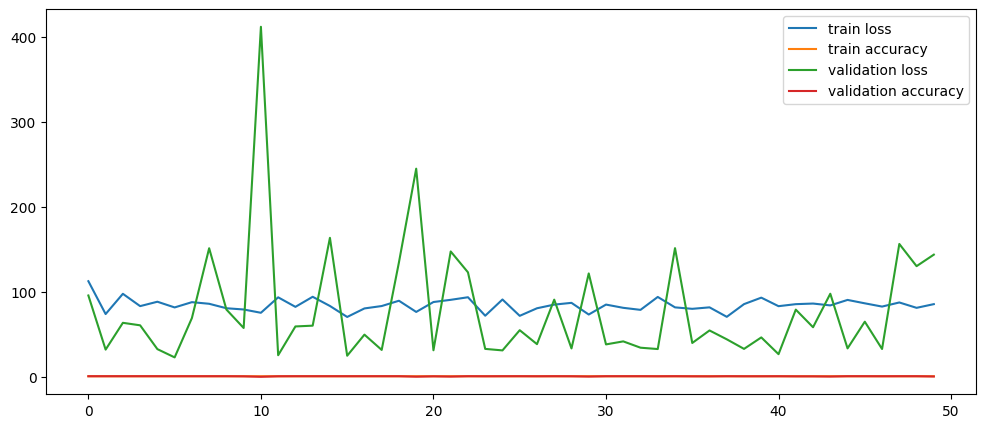

In [301]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist_new.history["loss"], label="train loss")
ax.plot(hist_new.history["accuracy"], label="train accuracy")
ax.plot(hist_new.history["val_loss"], label="validation loss")
ax.plot(hist_new.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [303]:
model_2_new=keras.models.Sequential(model_1.layers[:-1])
model_2_new.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_47 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 3072)           │        12,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 16)             │        49,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,856 (241.62 KB)

 Trainable params: 55,648 (217.38 KB)

 Non-trainable params: 6,208 (24.25 KB)

In [304]:
model_2_new.add(keras.layers.Dense(units =1 ,activation="sigmoid"))

In [307]:
for layer in model_2_new.layers[:-1]:
  print(layer.trainable)

True
True
True
True
True
True


In [308]:
model_2_new.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [306]:
hist_new_2=model_2_new.fit(x_train_new,y_train_new,epochs=50,validation_split=.15)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5853 - loss: 0.7510 - val_accuracy: 0.8767 - val_loss: 0.3852
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8655 - loss: 0.3965 - val_accuracy: 0.9167 - val_loss: 0.3030
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8995 - loss: 0.3228 - val_accuracy: 0.9178 - val_loss: 0.2667
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9044 - loss: 0.2961 - val_accuracy: 0.9178 - val_loss: 0.2461
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8951 - loss: 0.2946 - val_accuracy: 0.9167 - val_loss: 0.2327
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8998 - loss: 0.2667 - val_accuracy: 0.9200 - val_loss: 0.2226
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9140 - loss: 0.2439 - val_accuracy: 0.9211 - val_loss: 0.2151
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9145 - loss: 0.2385 - val_accuracy: 0.

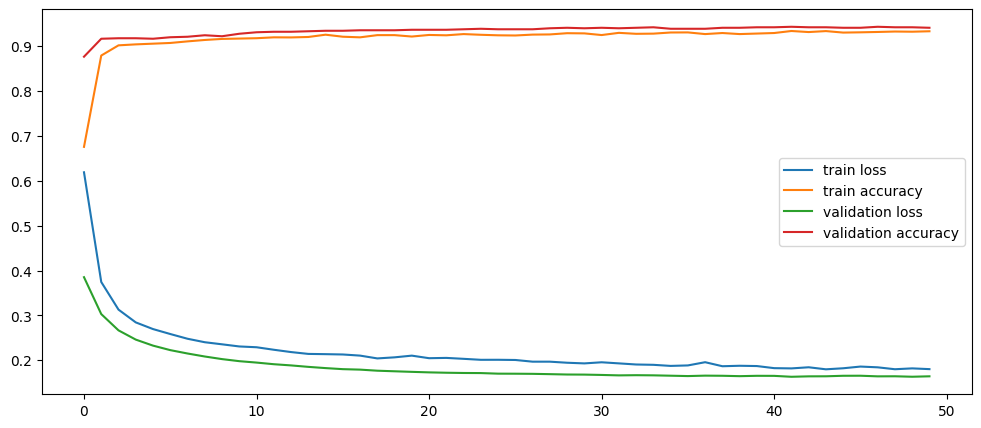

In [309]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist_new_2.history["loss"], label="train loss")
ax.plot(hist_new_2.history["accuracy"], label="train accuracy")
ax.plot(hist_new_2.history["val_loss"], label="validation loss")
ax.plot(hist_new_2.history["val_accuracy"], label="validation accuracy")
ax.legend()

Model with SGD(momentum=0.9)

In [313]:
model_2 = keras.Sequential()

model_2.add(keras.layers.Flatten(input_shape=[32,32,3]))
model_2.add(keras.layers.BatchNormalization())

model_2.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform' ))
model_2.add(keras.layers.BatchNormalization())

model_2.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform' ))
model_2.add(keras.layers.BatchNormalization())



model_2.add(keras.layers.Dense(units =1, activation = 'sigmoid' ))



c:\Users\ASUS\Desktop\machine learning\machine_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [314]:
model_2.compile(optimizer=tf.optimizers.SGD(momentum=0.9)
              ,loss='categorical_crossentropy',metrics=['accuracy'])

In [315]:
hist__2=model_2.fit(x_train_new,y_train_new,epochs=50,validation_split=.15)

Epoch 1/50


c:\Users\ASUS\Desktop\machine learning\machine_venv\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8164 - loss: 0.0000e+00 - val_accuracy: 0.4300 - val_loss: 0.0000e+00
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9019 - loss: 0.0000e+00 - val_accuracy: 0.7856 - val_loss: 0.0000e+00
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8988 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9007 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9019 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8928 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8948 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 9

Model with SGD(momentum=0.9,nesterov=True)

In [316]:
model_3 = keras.Sequential()

model_3.add(keras.layers.Flatten(input_shape=[32,32,3]))
model_3.add(keras.layers.BatchNormalization())

model_3.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform' ))
model_3.add(keras.layers.BatchNormalization())

model_3.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform' ))
model_3.add(keras.layers.BatchNormalization())



model_3.add(keras.layers.Dense(units =1, activation = 'sigmoid' ))



c:\Users\ASUS\Desktop\machine learning\machine_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [317]:
model_3.compile(optimizer=tf.optimizers.SGD(momentum=0.9,nesterov=True)
              ,loss='categorical_crossentropy',metrics=['accuracy'])

In [318]:
hist__3=model_3.fit(x_train_new,y_train_new,epochs=50,validation_split=.15)

Epoch 1/50


c:\Users\ASUS\Desktop\machine learning\machine_venv\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8053 - loss: 0.0000e+00 - val_accuracy: 0.7311 - val_loss: 0.0000e+00
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9044 - loss: 0.0000e+00 - val_accuracy: 0.9156 - val_loss: 0.0000e+00
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9005 - loss: 0.0000e+00 - val_accuracy: 0.9167 - val_loss: 0.0000e+00
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9029 - loss: 0.0000e+00 - val_accuracy: 0.9167 - val_loss: 0.0000e+00
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9012 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9009 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9046 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8931 - loss: nan - val_accuracy: 0.

Model with Adam

In [319]:
model_4 = keras.Sequential()

model_4.add(keras.layers.Flatten(input_shape=[32,32,3]))
model_4.add(keras.layers.BatchNormalization())

model_4.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform' ))
model_4.add(keras.layers.BatchNormalization())

model_4.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform' ))
model_4.add(keras.layers.BatchNormalization())

model_4.add(keras.layers.Dense(units =1, activation = 'sigmoid' ))

c:\Users\ASUS\Desktop\machine learning\machine_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [320]:
model_4.compile(optimizer=tf.optimizers.Adam()
              ,loss='categorical_crossentropy',metrics=['accuracy'])

In [321]:
hist__4=model_4.fit(x_train_new,y_train_new,epochs=50,validation_split=.15)

Epoch 1/50


c:\Users\ASUS\Desktop\machine learning\machine_venv\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6224 - loss: 0.0000e+00 - val_accuracy: 0.7922 - val_loss: 0.0000e+00
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7590 - loss: 0.0000e+00 - val_accuracy: 0.8156 - val_loss: 0.0000e+00
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8077 - loss: 0.0000e+00 - val_accuracy: 0.8433 - val_loss: 0.0000e+00
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.0000e+00 - val_accuracy: 0.8456 - val_loss: 0.0000e+00
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8587 - loss: 0.0000e+00 - val_accuracy: 0.8633 - val_loss: 0.0000e+00
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.0000e+00 - val_accuracy: 0.8856 - val_loss: 0.0000e+00
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8844 - loss: 0.0000e+00 - val_accuracy: 0.8644 - val_loss: 0.0000e+00
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

Model with Nadam

In [322]:
model_5 = keras.Sequential()

model_5.add(keras.layers.Flatten(input_shape=[32,32,3]))
model_5.add(keras.layers.BatchNormalization())

model_5.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform' ))
model_5.add(keras.layers.BatchNormalization())

model_5.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform' ))
model_5.add(keras.layers.BatchNormalization())

model_5.add(keras.layers.Dense(units =1, activation = 'sigmoid' ))

c:\Users\ASUS\Desktop\machine learning\machine_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [323]:
model_5.compile(optimizer=tf.optimizers.Nadam()
              ,loss='categorical_crossentropy',metrics=['accuracy'])

In [324]:
hist__5=model_5.fit(x_train_new,y_train_new,epochs=50,validation_split=.15)

Epoch 1/50


c:\Users\ASUS\Desktop\machine learning\machine_venv\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4642 - loss: 0.0000e+00 - val_accuracy: 0.6856 - val_loss: 0.0000e+00
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5834 - loss: 0.0000e+00 - val_accuracy: 0.7711 - val_loss: 0.0000e+00
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6990 - loss: 0.0000e+00 - val_accuracy: 0.8244 - val_loss: 0.0000e+00
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7849 - loss: 0.0000e+00 - val_accuracy: 0.8711 - val_loss: 0.0000e+00
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8256 - loss: 0.0000e+00 - val_accuracy: 0.8611 - val_loss: 0.0000e+00
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8449 - loss: 0.0000e+00 - val_accuracy: 0.8678 - val_loss: 0.0000e+00
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.0000e+00 - val_accuracy: 0.8789 - val_loss: 0.0000e+00
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

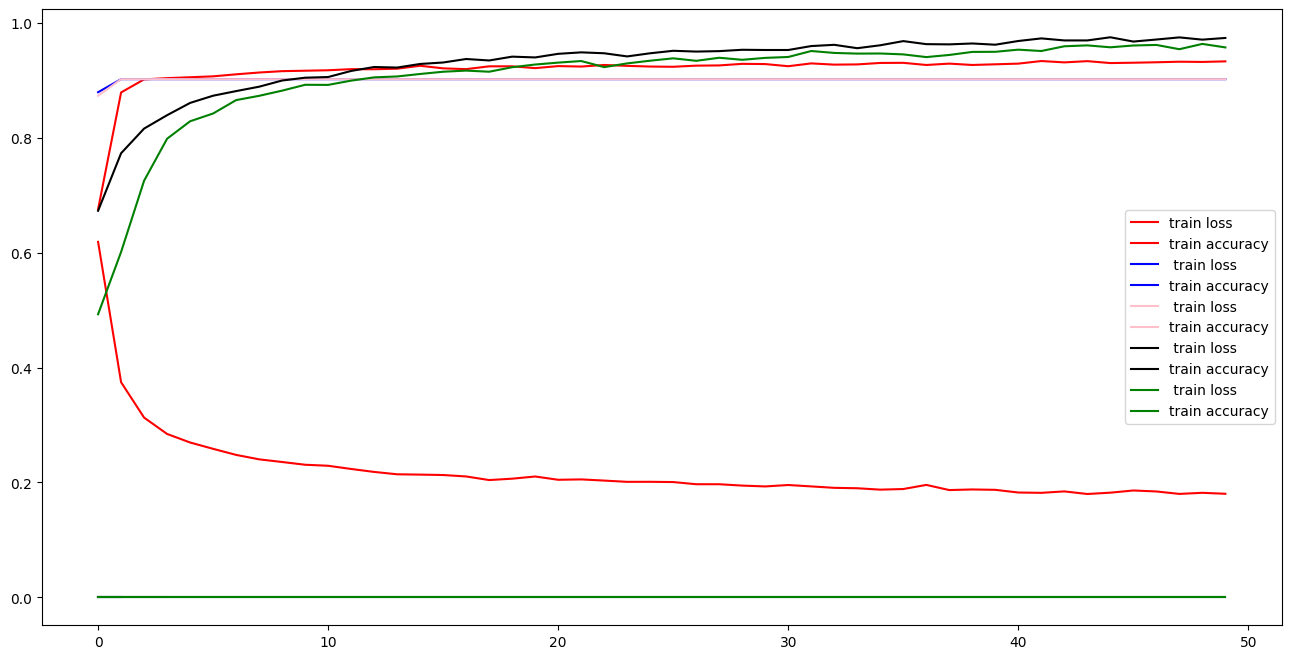

In [326]:
ig, ax = plt.subplots(figsize=(16, 8))
ax.plot(hist_new_2.history["loss"], label="train loss",color="red")
ax.plot(hist_new_2.history["accuracy"], label="train accuracy",color="red")
ax.plot(hist__2.history["loss"], label=" train loss",color="blue")
ax.plot(hist__2.history["accuracy"], label="train accuracy",color="blue")
ax.plot(hist__3.history["loss"], label=" train loss",color="pink")
ax.plot(hist__3.history["accuracy"], label="train accuracy",color="pink")
ax.plot(hist__4.history["loss"], label=" train loss",color="black")
ax.plot(hist__4.history["accuracy"], label="train accuracy",color="black")
ax.plot(hist__5.history["loss"], label=" train loss",color="green")
ax.plot(hist__5.history["accuracy"], label="train accuracy",color="green")


ax.legend()

In [18]:
y_test_new=np.where(y_test==7, 1, 0)[:600]

In [19]:
x_test_new=x_test[:600, :, :]

In [330]:
model_2.evaluate(x_test_new,y_test_new)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8998 - loss: nan 


[nan, 0.8999999761581421]

In [334]:
model_1_new.evaluate(x_test_new,y_test_new)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.6382 - loss: 1.9295


[1.790818214416504, 0.6366666555404663]

In [335]:
model_2_new.evaluate(x_test_new,y_test_new)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9083 - loss: 0.2284  


[0.24622495472431183, 0.9116666913032532]

In [331]:
model_3.evaluate(x_test_new,y_test_new)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8998 - loss: nan 


[nan, 0.8999999761581421]

In [332]:
model_4.evaluate(x_test_new,y_test_new)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8752 - loss: 0.0000e+00 


[0.0, 0.875]

In [333]:
model_5.evaluate(x_test_new,y_test_new)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8961 - loss: 0.0000e+00 


[0.0, 0.8916666507720947]

model_2 with Dropout and MCdropout ,l1-l2 

In [32]:
model_2_d = keras.Sequential()

model_2_d.add(keras.layers.Flatten(input_shape=[32,32,3]))
model_2_d.add(keras.layers.BatchNormalization())

model_2_d.add(keras.layers.Dense(units =16, activation = 'relu',kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4), kernel_initializer='he_uniform' ))
model_2_d.add(keras.layers.BatchNormalization())

model_2_d.add(keras.layers.Dense(units =16, activation = 'relu', kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),kernel_initializer='he_uniform' ))
model_2_d.add(keras.layers.BatchNormalization())
model_2_d.add(keras.layers.Dropout(0.1))


model_2_d.add(keras.layers.Dense(units =1, activation = 'sigmoid' ))



c:\Users\ASUS\Desktop\machine learning\machine_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model_2_d.compile(optimizer=tf.optimizers.SGD(momentum=0.9)
              ,loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
hist_2_d=model_2_d.fit(x_train_new,y_train_new,epochs=100,validation_split=.15)

Epoch 1/100


c:\Users\ASUS\Desktop\machine learning\machine_venv\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8007 - loss: 0.0809 - val_accuracy: 0.8056 - val_loss: 134.8718
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9007 - loss: 2673987.7500 - val_accuracy: 0.9167 - val_loss: 607394752.0000
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9055 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9011 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8982 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9079 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9089 - loss: nan - val_accuracy: 0.9167 - val_loss: nan
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9059 - loss: nan - val_accuracy: 0.9167 - val_loss: nan


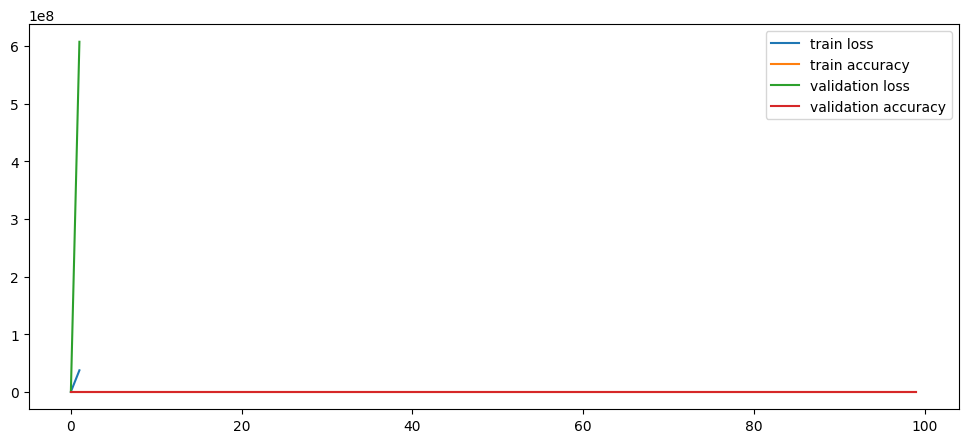

In [35]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist_2_d.history["loss"], label="train loss")
ax.plot(hist_2_d.history["accuracy"], label="train accuracy")
ax.plot(hist_2_d.history["val_loss"], label="validation loss")
ax.plot(hist_2_d.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [36]:
model_2_d_mcd=np.stack([model_2_d(x_test_new,training=True) for _ in range(50)])

Model just with Dropout

In [68]:
model_d= keras.Sequential()

model_d.add(keras.layers.Flatten(input_shape=[32,32,3]))
model_d.add(keras.layers.BatchNormalization())


model_d.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform') )
model_d.add(keras.layers.BatchNormalization())


model_d.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform' ))
model_d.add(keras.layers.BatchNormalization())
model_d.add(keras.layers.Dropout(0.1))

model_d.add(keras.layers.Dense(units =10, activation = 'softmax' ))

c:\Users\ASUS\Desktop\machine learning\machine_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model_d.compile(optimizer=tf.optimizers.Nadam()
              ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [70]:
hist_d=model_d.fit(x_train,y_train,epochs=100,validation_split=.15)

Epoch 1/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2725 - loss: 2.0576 - val_accuracy: 0.3901 - val_loss: 1.7196
Epoch 2/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3698 - loss: 1.7597 - val_accuracy: 0.4077 - val_loss: 1.6646
Epoch 3/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3965 - loss: 1.6971 - val_accuracy: 0.4102 - val_loss: 1.6361
Epoch 4/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4042 - loss: 1.6649 - val_accuracy: 0.4265 - val_loss: 1.5964
Epoch 5/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4184 - loss: 1.6374 - val_accuracy: 0.4340 - val_loss: 1.5841
Epoch 6/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4276 - loss: 1.6143 - val_accuracy: 0.4345 - val_loss: 1.5797
Epoch 7/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4334 - loss: 1.5919 - val_accuracy: 0.4437 - val_loss: 1.5617
Epoch 8/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4341 - loss: 1

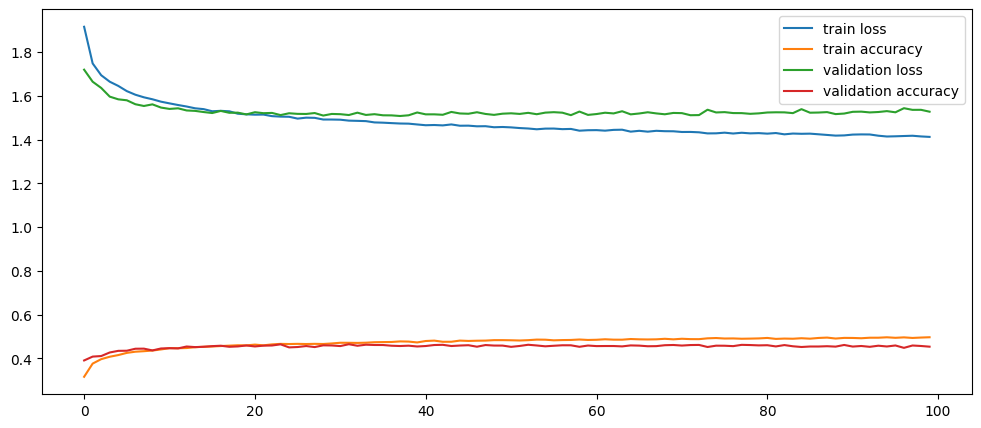

In [71]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist_d.history["loss"], label="train loss")
ax.plot(hist_d.history["accuracy"], label="train accuracy")
ax.plot(hist_d.history["val_loss"], label="validation loss")
ax.plot(hist_d.history["val_accuracy"], label="validation accuracy")
ax.legend()

Model just with Regularization l1-l2

In [63]:
model_l2= keras.Sequential()

model_l2.add(keras.layers.Flatten(input_shape=[32,32,3]))
model_l2.add(keras.layers.BatchNormalization())


model_l2.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)) )
model_l2.add(keras.layers.BatchNormalization())


model_l2.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform' ,kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
model_l2.add(keras.layers.BatchNormalization())


model_l2.add(keras.layers.Dense(units =10, activation = 'softmax' ))

In [64]:
model_l2.compile(optimizer=tf.optimizers.Nadam()
              ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [65]:
hist_l2=model_l2.fit(x_train,y_train,epochs=100,validation_split=.15)

Epoch 1/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2976 - loss: 2.0069 - val_accuracy: 0.3915 - val_loss: 1.7140
Epoch 2/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3975 - loss: 1.7146 - val_accuracy: 0.4082 - val_loss: 1.6754
Epoch 3/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4158 - loss: 1.6708 - val_accuracy: 0.4199 - val_loss: 1.6343
Epoch 4/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4288 - loss: 1.6438 - val_accuracy: 0.4205 - val_loss: 1.6379
Epoch 5/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4362 - loss: 1.6161 - val_accuracy: 0.4333 - val_loss: 1.6269
Epoch 6/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4408 - loss: 1.6241 - val_accuracy: 0.4376 - val_loss: 1.6221
Epoch 7/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4444 - loss: 1.6124 - val_accuracy: 0.4375 - val_loss: 1.6146
Epoch 8/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4426 - loss:

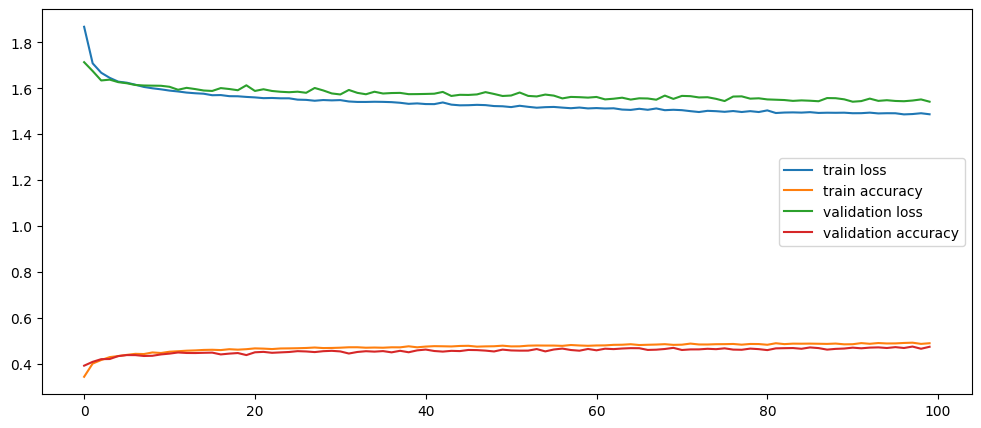

In [67]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist_l2.history["loss"], label="train loss")
ax.plot(hist_l2.history["accuracy"], label="train accuracy")
ax.plot(hist_l2.history["val_loss"], label="validation loss")
ax.plot(hist_l2.history["val_accuracy"], label="validation accuracy")
ax.legend()

after 100 time of epochs the gap between acuracy and val_acuracy had reduced.

Model with MCdropout

In [10]:
model__= keras.Sequential()

model__.add(keras.layers.Flatten(input_shape=[32,32,3]))
model__.add(keras.layers.BatchNormalization())


model__.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)) )
model__.add(keras.layers.BatchNormalization())


model__.add(keras.layers.Dense(units =16, activation = 'relu', kernel_initializer='he_uniform' ,kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
model__.add(keras.layers.BatchNormalization())
model__.add(keras.layers.Dropout(0.1))


model__.add(keras.layers.Dense(units =10, activation = 'softmax' ))

c:\Users\ASUS\Desktop\machine learning\machine_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model__.compile(optimizer=tf.optimizers.Nadam()
              ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
hist__=model__.fit(x_train,y_train,epochs=100,validation_split=.15)

Epoch 1/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2664 - loss: 2.1063 - val_accuracy: 0.3808 - val_loss: 1.7495
Epoch 2/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3732 - loss: 1.7713 - val_accuracy: 0.4050 - val_loss: 1.7037
Epoch 3/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3952 - loss: 1.7230 - val_accuracy: 0.4203 - val_loss: 1.6579
Epoch 4/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4071 - loss: 1.7022 - val_accuracy: 0.4201 - val_loss: 1.6640
Epoch 5/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4164 - loss: 1.6727 - val_accuracy: 0.4230 - val_loss: 1.6501
Epoch 6/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4148 - loss: 1.6717 - val_accuracy: 0.4292 - val_loss: 1.6357
Epoch 7/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4301 - loss: 1.6581 - val_accuracy: 0.4362 - val_loss: 1.6341
Epoch 8/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4337 - loss: 1

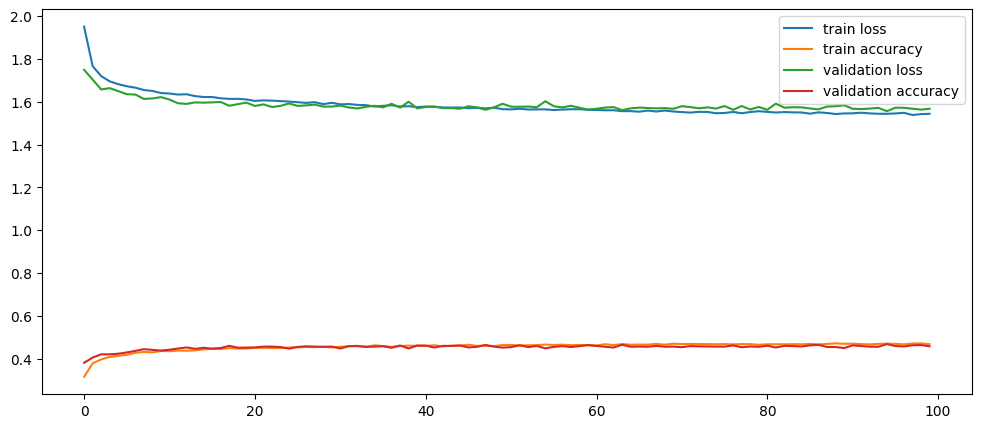

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist__.history["loss"], label="train loss")
ax.plot(hist__.history["accuracy"], label="train accuracy")
ax.plot(hist__.history["val_loss"], label="validation loss")
ax.plot(hist__.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [14]:
model_mcd=np.stack([model__(X_test,training=True) for _ in range(50)])

In [17]:
np.round(model_mcd.mean(axis=0)[:1],3)

array([[0.113, 0.24 , 0.028, 0.018, 0.025, 0.008, 0.032, 0.005, 0.357,
        0.175]], dtype=float32)